# Pyber Ride Sharing

In [8]:
# Dependencies
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Read CSV and Clean data
ride_data    = pd.read_csv('../Pyber/raw_data/ride_data.csv')
ride_data['ride_id'].value_counts() # check for duplicates => 'None Found'

city_data    = pd.read_csv('../Pyber/raw_data/city_data.csv')
city_data['city'].value_counts() # check for duplicates => 'Port James'
driver_total = city_data.groupby('city').sum() # sum driver_count to remove duplicates
dedup_data   = city_data[['city', 'type']].drop_duplicates().set_index('city') # remove extra city values

city_data    = {'driver_count': driver_total['driver_count'],
             'type':         dedup_data['type']}

city_data    = pd.DataFrame(city_data).reset_index().rename(columns={'index': 'city'})

# Merge DataFrames
pyber_data = pd.merge(city_data, ride_data)
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


## Bubble Plot of Ride Sharing Data

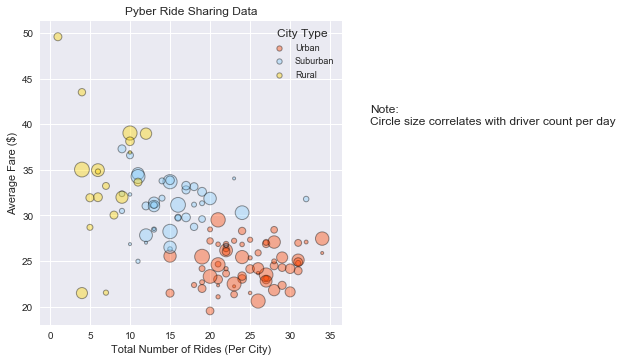

In [9]:
# Create Bubble Plot that showcases the relationship between four key variables
average_fare = pyber_data.groupby('city').mean()
total_ride   = pyber_data.groupby('city').count()
dedup_data   = pyber_data.drop_duplicates('city').set_index('city') # create to retrieve driver_count and type

bubble_data  = {'average fare': average_fare['fare'],
                'total ride':   total_ride['ride_id'],
                'total driver': dedup_data['driver_count'],
                'city type':    dedup_data['type']}

bubble_data  = pd.DataFrame(bubble_data).reset_index()

# The colors of each categorical value
colors       = ['orangered', 'lightskyblue', 'gold']

# Creates the bubble plot based upon the values above
# The size of each point on our plot is determined by their driver total
sns.set() # sets seaborn grid
sns.lmplot(x='total ride', y='average fare', hue='city type', data=bubble_data, fit_reg=False, legend_out=False, 
           scatter_kws={"s": bubble_data['total driver']*3, 'alpha':0.4, 'linewidth':1, 'edgecolors':"black"},
           palette=colors)

plt.legend(fontsize='9', title='City Type', markerscale=0.5) 
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.text(40, 40, "Note:\nCircle size correlates with driver count per day", ha='left')

plt.show()